### Data Preparation


In [1]:
import pandas as pd
dataset = pd.read_csv("dataset.csv")
# dataset = dataset[dataset['Country'] == "Thailand"]
# dataset = dataset[['postal code', 'latitude', 'longitude']]
# # dataset[dataset['postal code'] == 10240]
# columns = ['postal code', 'latitude', 'longitude']
# dataset.to_csv('finalPostal.csv',columns=columns, index=False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [3]:
# import csv
# import json

# def csv_to_json(csv_file, json_file):
#     # Read data from CSV file
#     with open(csv_file, 'r') as csvfile:
#         reader = csv.DictReader(csvfile)
#         data = [row for row in reader]

#     # Write data to JSON file
#     with open(json_file, 'w') as jsonfile:
#         json.dump(data, jsonfile, indent=4)

# # Example usage
# csv_file = 'finalPostal.csv'
# json_file = 'data.json'
# csv_to_json(csv_file, json_file)

In [2]:
import pandas as pd
dataset = pd.read_csv("dataset.csv")
dataset

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


The Data visualization 

In [3]:
import pandas as pd
import numpy as np



# Check class distribution
class_distribution = dataset['target'].value_counts()
print("Class Distribution Before Balancing:")
print(class_distribution)

# Determine the majority class and minority class
majority_class = class_distribution.idxmax()
minority_class = class_distribution.idxmin()
print(minority_class)

# Get the number of samples in the majority class
majority_class_count = class_distribution[majority_class]
minority_class_count = class_distribution[minority_class]
print(minority_class_count)

# Find indices of majority class samples
majority_indices = dataset[dataset['target'] == majority_class].index

# Randomly select majority class samples to drop
drop_indices = np.random.choice(majority_indices, size=majority_class_count - minority_class_count, replace=False)

# Drop selected majority class samples
balanced_df = dataset.drop(drop_indices)

# Check class distribution after balancing
balanced_class_distribution = balanced_df['target'].value_counts()
print("\nClass Distribution After Balancing:")
print(balanced_class_distribution)


Class Distribution Before Balancing:
target
0    1225312
1      80810
Name: count, dtype: int64
1
80810

Class Distribution After Balancing:
target
0    80810
1    80810
Name: count, dtype: int64


SyntaxError: invalid syntax (1498216984.py, line 1)

In [4]:
#preprocessing text
import nltk
from nltk.tokenize import word_tokenize # 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# clean data และจัดการข้อความให้อยู่ในรูปแบบที่ง่ายต่อการเรียนรู้
# เราจะใช้ library nltk ทำขั้นตอน preprocess ดังนี้
# tokenization
# stopword removal
# stemming by using porter stemmer

porter = PorterStemmer()
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
#     print(filtered_tokens)
    return " ".join(filtered_tokens)

# preprocess all training data
X_preprocessed = [preprocess_text(text) for text in balanced_df['question_text']]


### สร้าง Vector ของคำศัพท์ (Vectorizer)

In [6]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#divide dataset into to two pieces cosisted of training part and test part
sentences_train, sentences_test, y_train, y_test = train_test_split(X_preprocessed,balanced_df['target'] , 
                                                                    test_size=0.25, 
                                                                   random_state=100)


# ## สร้างคำศัพท์ที่ใช้เป็น feature จากข้อมูล train
# vectorizer = CountVectorizer()
# vectorizer.fit(sentences_train)

# X_train = vectorizer.transform(sentences_train)
# X_test = vectorizer.transform(sentences_test
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(vocab_size)
print(sentences_train[0])

50835
reset hp notebook pc factory settings


#### padding

In [7]:
from keras.preprocessing import sequence

max_len = 217 # most of sentences' length statistically lay between 10-183

X_train_padded = sequence.pad_sequences(X_train,padding='post', maxlen= max_len)
X_test_padded = sequence.pad_sequences(X_test,padding='post', maxlen = max_len)

print("X_train vector shape = {}".format(X_train_padded.shape))
print("X_test vector shape = {}".format(X_test_padded.shape))


X_train vector shape = (121215, 217)
X_test vector shape = (40405, 217)


#### สร้างตัวจำแนก classifier โดยเลือกใช้  Bidirectional LSTM

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout
from tensorflow.keras.backend import clear_session
clear_session()

input_dimension = 50820 # based on total amount of vocabulary

model = Sequential()

# adding layers on top of one another

model.add(Embedding(input_dim=input_dimension , output_dim=100, input_length=max_len))#embedding layer
#consider output_dimension as hyperparameter ,then 100 was the best tunning value of output_dim 

model.add(Bidirectional(LSTM(64)))

# model.add(Dropout(0.5))

model.add(Dense(10, activation = 'relu' ))# second layer, dense layer using relu as activation function  
model.add(Dropout(0.5)) 
# model.add(Dense(20, activation = 'relu' ))
model.add(Dense(1, activation='sigmoid')) # dense layer , use sigmoid function to produce 1 or 0 output
# we'll use softmax activation function for multiclass classification
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) # use binary_crossentropy loss function for binary target classification
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 217, 100)          5082000   
                                                                 
 bidirectional (Bidirection  (None, 128)               84480     
 al)                                                             
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5167781 (19.71 MB)
Trainable params: 5167781 (19.71 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [9]:
score = model.fit(x=X_train_padded, y= y_train, 
                      epochs=5,
                     verbose=True,
                     validation_data=(X_test_padded, y_test),
                     batch_size=128)

Epoch 1/5
947/947 [==============================] - 645s 678ms/step - loss: 0.3880 - accuracy: 0.8471 - val_loss: 0.3020 - val_accuracy: 0.8791
Epoch 2/5
947/947 [==============================] - 561s 592ms/step - loss: 0.3131 - accuracy: 0.8871 - val_loss: 0.2976 - val_accuracy: 0.8822
Epoch 3/5
947/947 [==============================] - 556s 587ms/step - loss: 0.2847 - accuracy: 0.8958 - val_loss: 0.3158 - val_accuracy: 0.8793
Epoch 4/5
947/947 [==============================] - 548s 578ms/step - loss: 0.2554 - accuracy: 0.9056 - val_loss: 0.3323 - val_accuracy: 0.8765
Epoch 5/5
947/947 [==============================] - 545s 576ms/step - loss: 0.2324 - accuracy: 0.9132 - val_loss: 0.3794 - val_accuracy: 0.8704


In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.tick_params(axis='both', colors='black')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.tick_params(axis='both', colors='black')
    plt.title('Training and validation loss')
    plt.legend()

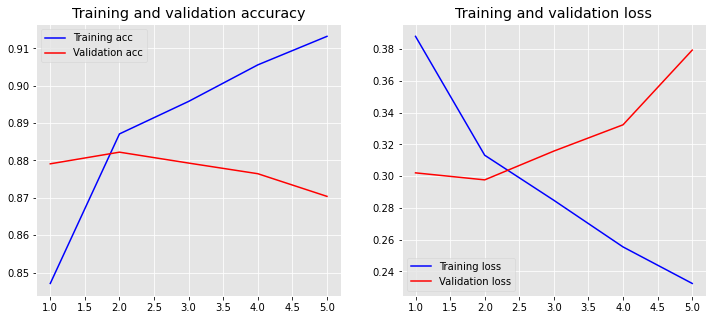

In [15]:
plot_history(score)

In [16]:
loss, accuracy = model.evaluate(X_train_padded, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9351
Testing Accuracy:  0.8704


In [18]:
predicted = model.predict(X_test_padded)
predicted = [1 if predict >= 0.5 else 0 for predict in predicted]

1263/1263 [==============================] - 27s 21ms/step


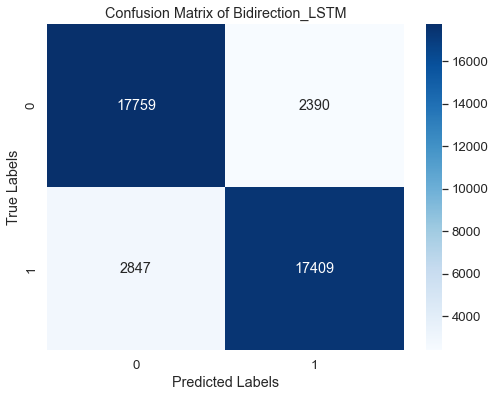

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Bidirection_LSTM')
plt.show()